In [792]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
%matplotlib inline
import seaborn as sns
sns.set()

In [793]:
df=pd.read_csv('BostonHousing.csv')

In [794]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [795]:
column=['Crime Rate','Residential Proportion','non-retail business acres/Town','Charles River','NO2 concentration','Average Rooms/Dwelling','Prior Built Units Proportion', ' Distance to Employeent Centres','Radial Highways Distance','ValueProperty/tax rate','Teacher/town','blacks/town','lower Status Percent','Median home price']
columns=column[:-1]
target='Median home price'

In [796]:
df.columns=column

In [797]:
df.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling,Prior Built Units Proportion,Distance to Employeent Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,lower Status Percent,Median home price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [798]:
df.shape

(506, 14)

In [799]:
df.isnull().sum()

Crime Rate                         0
Residential Proportion             0
non-retail business acres/Town     0
Charles River                      0
NO2 concentration                  0
Average Rooms/Dwelling             5
Prior Built Units Proportion       0
 Distance to Employeent Centres    0
Radial Highways Distance           0
ValueProperty/tax rate             0
Teacher/town                       0
blacks/town                        0
lower Status Percent               0
Median home price                  0
dtype: int64

### Creating Dependent (Y)and Independent Columns(X)

In [800]:
X=df.drop(['Median home price'],axis=1)
Y=df[[target]]
Y.head()

,Median home price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [801]:
print(Y.shape)
print(X.shape)

(506, 1)
(506, 13)


In [802]:
X.isnull().sum()
X['Average Rooms/Dwelling'].fillna(
    X['Average Rooms/Dwelling'].mean(),
    inplace=True)


C:\Users\aliah\AppData\Local\Temp\ipykernel_3540\2579747395.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Average Rooms/Dwelling'].fillna(


## Normalization

In [803]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
x_scaled_minmax=min_max_scaler.fit_transform(X)
X=pd.DataFrame(x_scaled_minmax , columns=columns)
X.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling,Prior Built Units Proportion,Distance to Employeent Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,lower Status Percent
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [804]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y, test_size=0.30,random_state=25,shuffle=True)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(354, 13) (354, 1)
(152, 13) (152, 1)


### Training Model, Predicting & Testing

In [805]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [806]:
print(xtrain.isna().sum())
print(xtrain.shape)
print(xtrain.dtypes)


Crime Rate                         0
Residential Proportion             0
non-retail business acres/Town     0
Charles River                      0
NO2 concentration                  0
Average Rooms/Dwelling             0
Prior Built Units Proportion       0
 Distance to Employeent Centres    0
Radial Highways Distance           0
ValueProperty/tax rate             0
Teacher/town                       0
blacks/town                        0
lower Status Percent               0
dtype: int64
(354, 13)
Crime Rate                         float64
Residential Proportion             float64
non-retail business acres/Town     float64
Charles River                      float64
NO2 concentration                  float64
Average Rooms/Dwelling             float64
Prior Built Units Proportion       float64
 Distance to Employeent Centres    float64
Radial Highways Distance           float64
ValueProperty/tax rate             float64
Teacher/town                       float64
blacks/town            

In [807]:
xtrain['Average Rooms/Dwelling'].fillna(
    xtrain['Average Rooms/Dwelling'].mean(),
    inplace=True
)


C:\Users\aliah\AppData\Local\Temp\ipykernel_3540\1656730700.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  xtrain['Average Rooms/Dwelling'].fillna(


In [808]:
xtest['Average Rooms/Dwelling'].fillna(
    xtrain['Average Rooms/Dwelling'].mean(),
    inplace=True
)


C:\Users\aliah\AppData\Local\Temp\ipykernel_3540\2817636158.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  xtest['Average Rooms/Dwelling'].fillna(


In [809]:
model.fit(xtrain,ytrain)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [810]:
pred=model.predict(xtest)
pred2=model.predict(xtrain)

In [811]:
model.coef_

array([[-10.25213823,   5.05599427,   0.76774744,   0.73285455,
         -9.23052789,  20.98838387,  -0.45286324, -16.99837522,
          8.46029618,  -8.73154927,  -9.29617848,   2.95139505,
        -16.64980758]])

In [812]:
model.intercept_

array([27.44809564])

### Checking r2 by sklearn metric
r2 is a statistic that will give some information about the goodness of fit of a model. In linear regression , the R2 coefficeint of determination is a statistical measure of how well the regression predictions approximate the real data points

In [813]:
from sklearn.metrics import r2_score
test_r2=r2_score(ytest,pred)

In [814]:
train_r2=r2_score(ytrain,pred2)

In [815]:
print('R2 score for testing : ',test_r2)
print('R2 score for Training : ', train_r2)

R2 score for testing :  0.7120610333156985
R2 score for Training :  0.7431646527497848


In [816]:
def adjusted_r2(n,p,test_r2):
    return 1-(1-test_r2)*(n-1)/(n-p-1)
n=xtest.shape[0]
p=xtest.shape[1]
print('The adjusted r2 score of x test:',adjusted_r2(n,p,test_r2))


The adjusted r2 score of x test: 0.6849363480483368


In [817]:
def adjusted_r2(n,p,train_r2):
    return 1-(1-train_r2)*(n-1)/(n-p-1)
n=xtrain.shape[0]
p=xtrain.shape[1]
print('The adjusted r2 score of x train:',adjusted_r2(n,p,train_r2))


The adjusted r2 score of x train: 0.7333444777078648


In [818]:
r_2=[]
for i in range(1,xtest.shape[-1]+1):
    m=LinearRegression()
    m.fit(xtrain.values[:,:i],ytrain)
    prd=m.predict(xtest.values[:,:i])
    r_2.append(r2_score(ytest,prd))

In [819]:
r_2

[0.13035474849491968,
 0.17083635416893195,
 0.21811763170326548,
 0.3011295387421311,
 0.3052421261157692,
 0.5291156796884499,
 0.5332530042728238,
 0.559458729147098,
 0.5597355438252225,
 0.5635682169937517,
 0.5874358425953395,
 0.6190833994806817,
 0.7120610333156985]

Text(0, 0.5, 'r_2 score')

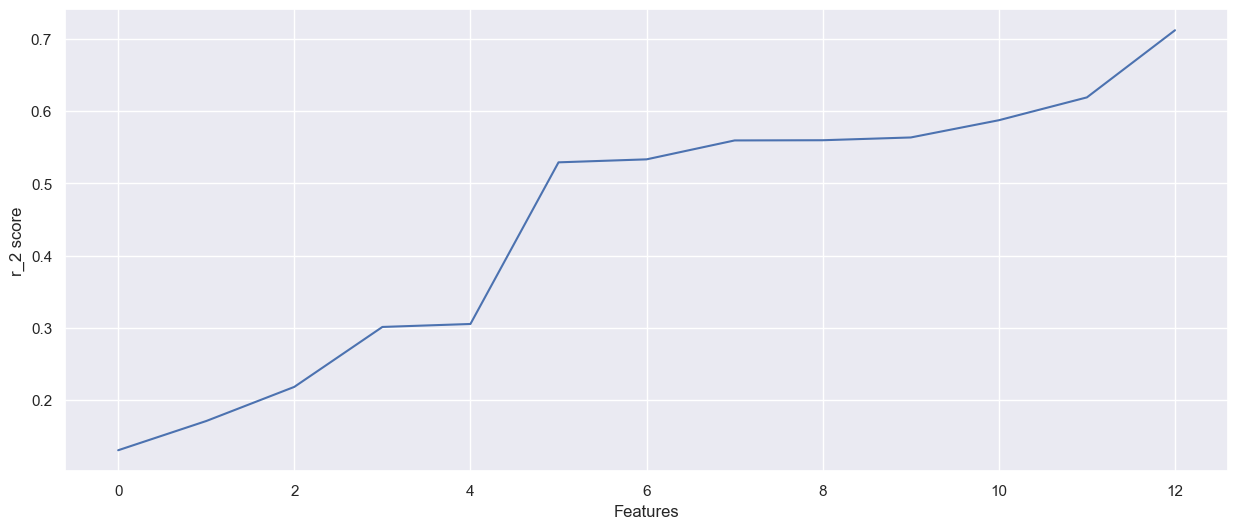

In [820]:
plt.figure(figsize=(15,6))
sns.lineplot(data=r_2)
plt.xlabel('Features')
plt.ylabel('r_2 score')

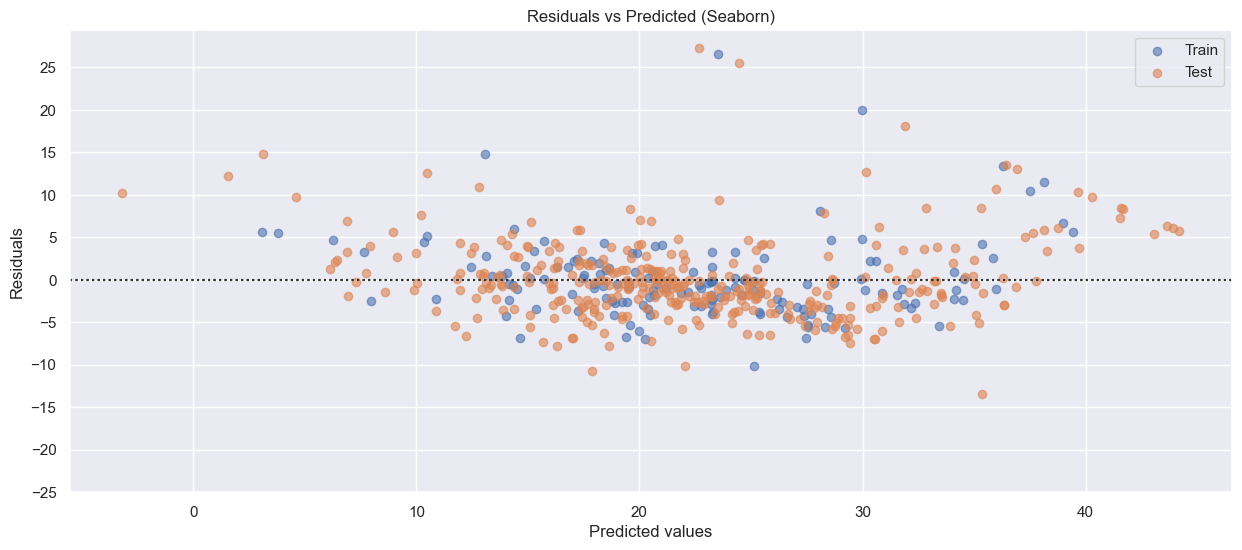

In [821]:
import seaborn as sns

plt.figure(figsize=(15,6))
sns.residplot(x=pred,
               y=ytest.values,
                lowess=False,
                scatter_kws={'alpha':0.6},
                label='Train')
sns.residplot(x=pred2,
             y=ytrain.values,
             scatter_kws={'alpha':0.6},
             label='Test')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Seaborn)")
plt.yticks(np.arange(-25, 30, 5))
plt.legend()
plt.show()


In [822]:
from sklearn.feature_selection import RFE
lrm=LinearRegression()

In [823]:
# recursive feature elimination with cross validation,using r- squared as metric
rfe=RFE( estimator=lrm , step=3 , n_features_to_select=None)
rfe.fit(X , Y.values)

,"estimator estimator: ``Estimator`` instanceA supervised learning estimator with a ``fit`` method that providesinformation about feature importance(e.g. `coef_`, `feature_importances_`).",LinearRegression()
,"n_features_to_select n_features_to_select: int or float, default=NoneThe number of features to select. If `None`, half of the features areselected. If integer, the parameter is the absolute number of featuresto select. If float between 0 and 1, it is the fraction of features toselect... versionchanged:: 0.24 Added float values for fractions.",None
,"step step: int or float, default=1If greater than or equal to 1, then ``step`` corresponds to the(integer) number of features to remove at each iteration.If within (0.0, 1.0), then ``step`` corresponds to the percentage(rounded down) of features to remove at each iteration.",3
,"verbose verbose: int, default=0Controls verbosity of output.",0
,"importance_getter importance_getter: str or callable, default='auto'If 'auto', uses the feature importance either through a `coef_`or `feature_importances_` attributes of estimator.Also accepts a string that specifies an attribute name/pathfor extracting feature importance (implemented with `attrgetter`).For example, give `regressor_.coef_` in case of:class:`~sklearn.compose.TransformedTargetRegressor` or`named_steps.clf.feature_importances_` in case ofclass:`~sklearn.pipeline.Pipeline` with its last step named `clf`.If `callable`, overrides the default feature importance getter.The callable is passed with the fitted estimator and it shouldreturn importance for each feature... versionadded:: 0.24",'auto'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [824]:
rfe.ranking_

array([1, 3, 4, 4, 1, 1, 4, 1, 2, 3, 1, 3, 1])

In [825]:
X.columns

Index(['Crime Rate', 'Residential Proportion',
       'non-retail business acres/Town', 'Charles River', 'NO2 concentration',
       'Average Rooms/Dwelling', 'Prior Built Units Proportion',
       ' Distance to Employeent Centres', 'Radial Highways Distance',
       'ValueProperty/tax rate', 'Teacher/town', 'blacks/town',
       'lower Status Percent'],
      dtype='object')

In [826]:
rfe.support_

array([ True, False, False, False,  True,  True, False,  True, False,
       False,  True, False,  True])

In [827]:
feature_name=np.array(columns)

In [828]:
list(feature_name[rfe.support_])

[np.str_('Crime Rate'),
 np.str_('NO2 concentration'),
 np.str_('Average Rooms/Dwelling'),
 np.str_(' Distance to Employeent Centres'),
 np.str_('Teacher/town'),
 np.str_('lower Status Percent')]

In [829]:
# print the optimal number of feature
print('Optimal number of features :%d' % rfe.n_features_)
feature_col_selected=list((feature_name)[rfe.support_])
print('Feature selected : '+ str(feature_col_selected))

Optimal number of features :6
Feature selected : [np.str_('Crime Rate'), np.str_('NO2 concentration'), np.str_('Average Rooms/Dwelling'), np.str_(' Distance to Employeent Centres'), np.str_('Teacher/town'), np.str_('lower Status Percent')]


In [830]:
xtrain_new=xtrain[list(feature_name[rfe.support_])]
xtest_new=xtest[list(feature_name[rfe.support_])]


In [831]:
print(xtrain_new.shape)
print(xtest_new.shape)

(354, 6)
(152, 6)


In [832]:
print(ytrain.shape)
print(ytest.shape)

(354, 1)
(152, 1)


In [833]:
lm2=LinearRegression()
lm2.fit(xtrain_new,ytrain)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [834]:
pred_new=lm2.predict(xtest_new)
pred_xtrain=lm2.predict(xtrain_new)

In [835]:
# printing r2 score
print('The R-squared(r2) value is {0:0.4f}: \n'.format( r2_score(ytest,pred_new)))
# printing r2 score
print('The R-squared(r2) value is {0:0.4f}: \n'.format( r2_score(ytrain,pred_xtrain)))



The R-squared(r2) value is 0.6785: 

The R-squared(r2) value is 0.7191: 



### Adjusted R2

In [836]:
print('The adjusted r2 score of x test new is :',adjusted_r2(n,p,r2_score(ytest,pred_new)))
print('The adjusted r2 score of x test new is :',adjusted_r2(n,p,r2_score(ytrain,pred_xtrain)))

The adjusted r2 score of x test new is : 0.6661616565078627
The adjusted r2 score of x test new is : 0.7083890898484992


### Cross Validation

In [837]:
from sklearn.model_selection import cross_val_score

In [838]:
scores=cross_val_score(lm2 , xtrain_new , ytrain , cv=5)
scores2=cross_val_score(lm2 , xtest_new , ytest , cv=5)

In [839]:
print('The score for x train new is :',scores)
print('The score for x test new is :',scores2)

The score for x train new is : [0.76934431 0.73020982 0.54693987 0.59885865 0.73903991]
The score for x test new is : [0.60210782 0.45809423 0.61987955 0.71973204 0.79498122]


In [840]:
print('The average score for x train new is :',scores.mean())
print('The average score for x test new is : ',scores2.mean())

The average score for x train new is : 0.6768785122311602
The average score for x test new is :  0.6389589702509759


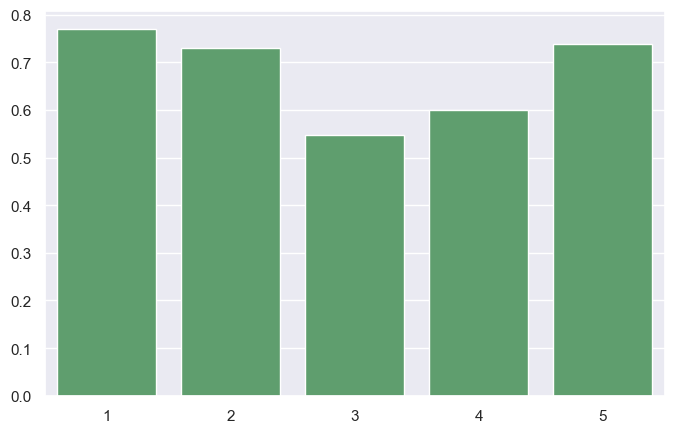

In [841]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(range(1,len(scores)+1)),y=scores,color='g')
plt.show()